In [ ]:
import pandas as pd

# **Load Dataset**

In [ ]:
dataset = pd.read_csv('AB_4A_bioactivity_data_3class_pIC50_pubchem_fp.csv')
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.958607
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.515700
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.124939
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.113509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.602060
413,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.602060
414,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.602060
415,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.829738


In [ ]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
413,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
414,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
415,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = dataset.iloc[:,-1]
Y

0      4.958607
1      5.000000
2      3.515700
3      4.124939
4      4.113509
         ...   
412    4.602060
413    4.602060
414    4.602060
415    4.829738
416    4.651695
Name: pIC50, Length: 417, dtype: float64

# **Removing low Variance data**

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# This function removes low variance features from the input data
# Features with variance below the given threshold are discarded

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]


In [ ]:
X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,...,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP803,PubchemFP819,PubchemFP821,PubchemFP824
0,1,0,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
1,1,0,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1,0,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
413,0,0,0,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
414,0,0,0,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
415,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#convert dataset to csv
X.to_csv('descriptor_list.csv', index = False)

# **Random Forest Regression Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.950910108160537

# **Model Prediction**

In [ ]:
Y_pred = model.predict(X)
Y_pred

array([4.97142559, 4.96314625, 3.59974767, 4.0822525 , 4.0822525 ,
       4.46357626, 3.90863851, 4.05908977, 4.15286002, 3.9308771 ,
       4.47148762, 4.33150679, 4.15196583, 4.3687843 , 4.16882872,
       4.17078281, 4.48631918, 4.48631918, 4.3338787 , 4.82573599,
       4.25233357, 4.63657207, 4.24124507, 4.25788275, 4.52300501,
       3.59974767, 7.49174077, 5.46159814, 5.60226699, 5.68154454,
       5.68154454, 6.71453713, 6.12509636, 5.53939013, 5.51720323,
       5.3411171 , 5.54885252, 5.42833232, 6.79356326, 7.60683319,
       6.91959751, 7.69888005, 6.86400164, 7.16997226, 7.72396783,
       7.58761888, 7.72396783, 6.40267723, 7.44461   , 6.81881735,
       6.76969819, 6.87584815, 6.49405178, 6.4816249 , 6.10973942,
       6.19899153, 7.18549066, 6.93037213, 6.61818108, 6.68778583,
       6.32747467, 6.64185151, 6.30225171, 6.16716063, 6.02477176,
       6.81510444, 6.35591166, 6.56762202, 8.38639017, 7.62278678,
       8.38639017, 7.97910373, 8.1561197 , 8.43718331, 8.43718

# **Model Performance**

In [ ]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.08
Coefficient of determination (R^2): 0.95


# **Data Visualization**

Text(0.5, 0, 'Experimental pIC50')

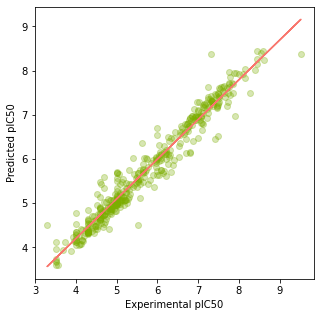

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# **Save Model as Pickle File**


In [ ]:
import pickle
pickle.dump(model, open('Amyloid_Beta_A4_model.pkl', 'wb'))